# Analisis Eksploratif pada Dataset 1000 Film Terbaik IMDb

Proyek ini menyajikan analisis data eksploratif (EDA) terhadap dataset "IMDb Top 1000 Movies". Tujuan utamanya adalah untuk mengidentifikasi pola, tren, dan korelasi signifikan dari film-film yang paling diakui secara global.

Fokus analisis ini adalah untuk menjawab pertanyaan-pertanyaan berikut:

* Sutradara: Siapa saja sutradara dengan konsistensi karya tertinggi yang masuk dalam daftar?

* Genre: Genre apa yang paling umum, dan bagaimana karakteristik rating pada genre-genre tersebut?

* Tren: Bagaimana evolusi atribut film, seperti durasi dan rating, seiring berjalannya waktu?

In [ ]:
# Setup dan Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Library dan setup siap digunakan.")

Library dan setup siap digunakan.


In [ ]:
# Langkah 2: Memuat dan Membersihkan Data
try:
    df = pd.read_csv('imdb_top_1000.csv')
    print("Dataset berhasil dimuat.")
    print("Bentuk dataset (baris, kolom):", df.shape)
except FileNotFoundError:
    print("Error: File 'imdb_top_1000.csv' tidak ditemukan.")
    print("Pastikan nama file sudah benar dan berada di folder yang sama dengan script ini.")
    # Keluar dari script jika file tidak ditemukan
    exit()

print("\nInfo awal dataset:")
df.info()

Dataset berhasil dimuat.
Bentuk dataset (baris, kolom): (1000, 16)

Info awal dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64

In [ ]:
# 3. Proses Pembersihan Data (Data Cleaning)
df_clean = df.copy()

# Membersihkan kolom 'Runtime' (Contoh: '142 min' -> 142)
df_clean['Runtime'] = df_clean['Runtime'].str.replace(' min', '').astype(int)

# Membersihkan kolom 'Gross' (Contoh: '1,234,567' -> 1234567)
df_clean['Gross'] = df_clean['Gross'].str.replace(',', '', regex=False)
df_clean['Gross'] = pd.to_numeric(df_clean['Gross'], errors='coerce') # Jika ada error, ubah jadi NaN

# Mengubah 'Released_Year' menjadi angka (jika ternyata masih teks)
if df_clean['Released_Year'].dtype == 'object':
    df_clean['Released_Year'] = pd.to_numeric(df_clean['Released_Year'], errors='coerce')

# Menangani nilai kosong (missing values)
# Untuk kolom angka, kita isi nilai kosong dengan nilai median (nilai tengah) agar aman.
df_clean['Gross'].fillna(df_clean['Gross'].median())
df_clean['Meta_score'].fillna(df_clean['Meta_score'].median())

# Untuk kolom 'Certificate', baris yang nilainya kosong akan kita hapus.
df_clean.dropna(subset=['Certificate'], inplace=True)

# 4. Tampilkan Hasil Pembersihan untuk verifikasi
print("\nInfo dataset setelah dibersihkan:")
df_clean.info()

print("\n5 baris pertama data yang sudah bersih:")
print(df_clean.head())


Info dataset setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    899 non-null    object 
 1   Series_Title   899 non-null    object 
 2   Released_Year  898 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        899 non-null    int64  
 5   Genre          899 non-null    object 
 6   IMDB_Rating    899 non-null    float64
 7   Overview       899 non-null    object 
 8   Meta_score     787 non-null    float64
 9   Director       899 non-null    object 
 10  Star1          899 non-null    object 
 11  Star2          899 non-null    object 
 12  Star3          899 non-null    object 
 13  Star4          899 non-null    object 
 14  No_of_Votes    899 non-null    int64  
 15  Gross          785 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 119.4+ KB

5 baris

/tmp/ipython-input-2065213355.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='viridis')


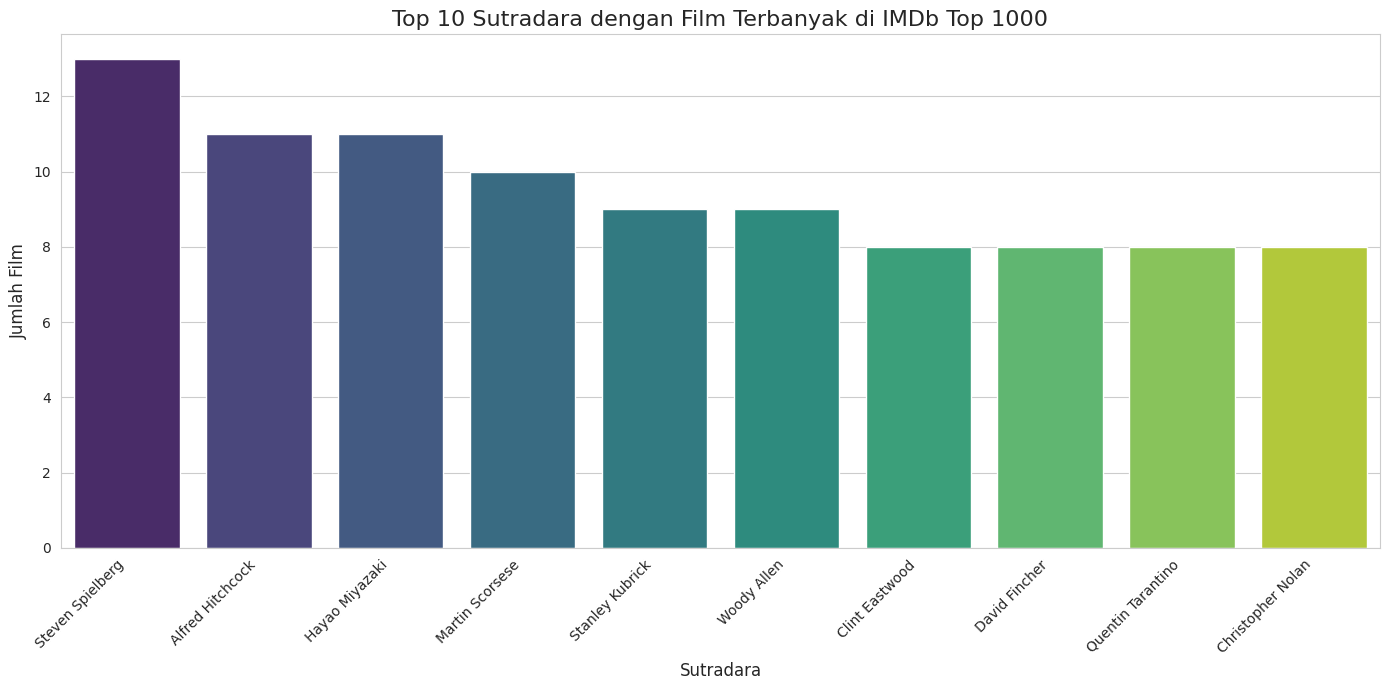

In [ ]:
# Hitung jumlah film untuk setiap sutradara dan ambil 10 teratas
top_10_directors = df_clean['Director'].value_counts().head(10)

# Buat visualisasi
plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette='viridis')
plt.title('Top 10 Sutradara dengan Film Terbanyak di IMDb Top 1000', fontsize=16)
plt.xlabel('Sutradara', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Sutradara Berdasarkan diagram batang di atas, kita dapat melihat beberapa poin kunci:

* Posisi Puncak yang Jelas: Steven Spielberg berada di peringkat pertama dengan jumlah film terbanyak, yaitu 13 film. Batangnya adalah yang paling tinggi di antara yang lain.

* Peringkat Kedua: Tepat di bawah Spielberg, Alfred Hitchcock dan Hayao Miyazaki menempati posisi kedua dengan jumlah film yang sama, yaitu 11 film.

* Kelompok Papan Tengah: Terdapat kelompok sutradara di bagian tengah dengan jumlah film yang berdekatan. Martin Scorsese memiliki 10 film, sementara Stanley Kubrick dan Woody Allen sama-sama memiliki 9 film.

* Empat Sutradara dengan Jumlah Sama: Di bagian akhir daftar, ada empat sutradara yang memiliki jumlah film yang sama persis, yaitu 8 film. Mereka adalah Clint Eastwood, David Fincher, Quentin Tarantino, dan Christopher Nolan.

Kesimpulan dari Grafik: Grafik ini menunjukkan adanya tingkatan yang jelas di antara para sutradara top. Meskipun Steven Spielberg memimpin, selisih jumlah film antara sutradara di peringkat atas dan bawah dalam daftar 10 besar ini tidak terlalu besar, hanya berbeda 5 film antara peringkat pertama dan terakhir.

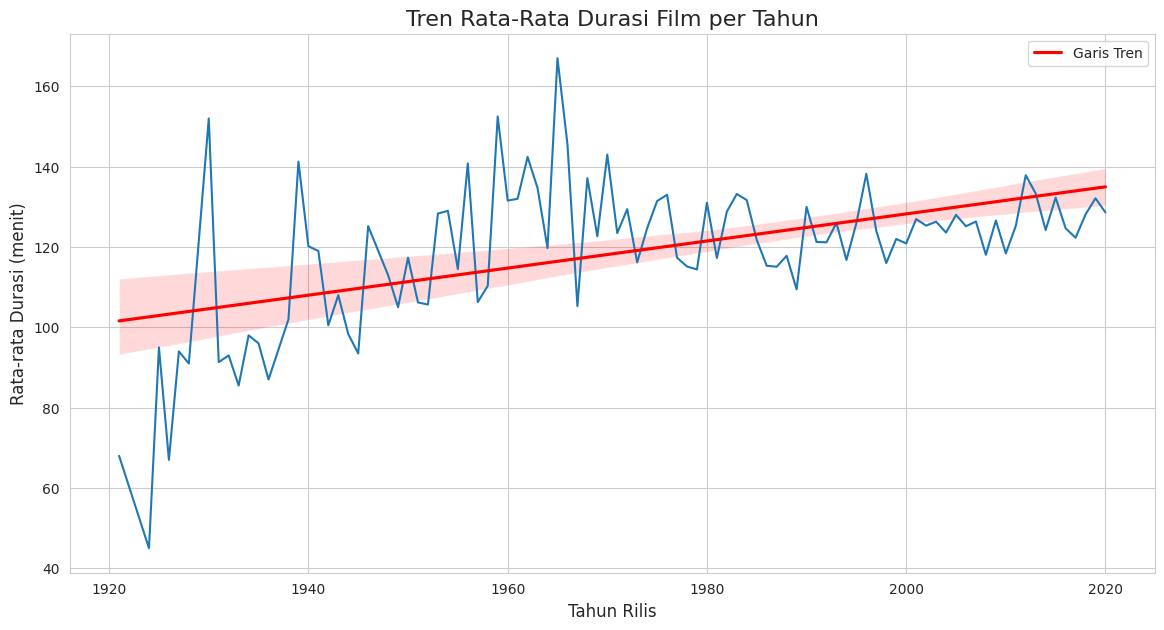

In [ ]:
# Kelompokkan berdasarkan tahun rilis dan hitung rata-rata durasinya
runtime_per_year = df_clean.groupby('Released_Year')['Runtime'].mean().reset_index()

# Buat visualisasi line plot dengan garis tren
plt.figure(figsize=(14, 7))
sns.lineplot(x='Released_Year', y='Runtime', data=runtime_per_year)
sns.regplot(x='Released_Year', y='Runtime', data=runtime_per_year, scatter=False, color='red', label='Garis Tren')
plt.title('Tren Rata-Rata Durasi Film per Tahun', fontsize=16)
plt.xlabel('Tahun Rilis', fontsize=12)
plt.ylabel('Rata-rata Durasi (menit)', fontsize=12)
plt.legend()
plt.show()

Analisis Grafik: Tren Rata-Rata Durasi Film per Tahun
Berdasarkan grafik garis di atas, berikut adalah poin-poin utamanya:

* Tren Jangka Panjang Meningkat: Garis tren berwarna merah dengan jelas menunjukkan arah naik dari kiri ke kanan. Ini menandakan bahwa secara keseluruhan, rata-rata durasi film terbaik cenderung menjadi lebih panjang seiring berjalannya waktu, dari tahun 1920 hingga 2020.

* Fluktuasi yang Signifikan: Garis biru, yang mewakili rata-rata durasi film aktual per tahun, terlihat sangat naik-turun. Ini menunjukkan bahwa meskipun tren jangka panjangnya meningkat, rata-rata durasi film sangat bervariasi dari satu tahun ke tahun berikutnya.

* Durasi di Era Awal Lebih Pendek: Pada bagian kiri grafik (sekitar tahun 1920-an hingga 1940-an), garis biru sering berada di posisi yang lebih rendah, menunjukkan bahwa film-film pada era tersebut rata-rata memiliki durasi yang lebih pendek.

* Adanya Puncak Ekstrem: Terlihat ada beberapa puncak yang sangat tinggi, terutama satu puncak di sekitar tahun 1960-an, di mana rata-rata durasi film pada tahun itu jauh melampaui tahun-tahun di sekitarnya.

Kesimpulan dari Grafik:

* Ada tren yang jelas bahwa film menjadi lebih panjang selama 100 tahun terakhir.

* Namun, durasi rata-rata per tahunnya tidak stabil dan bisa berubah secara drastis.

/tmp/ipython-input-929626635.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='mako')


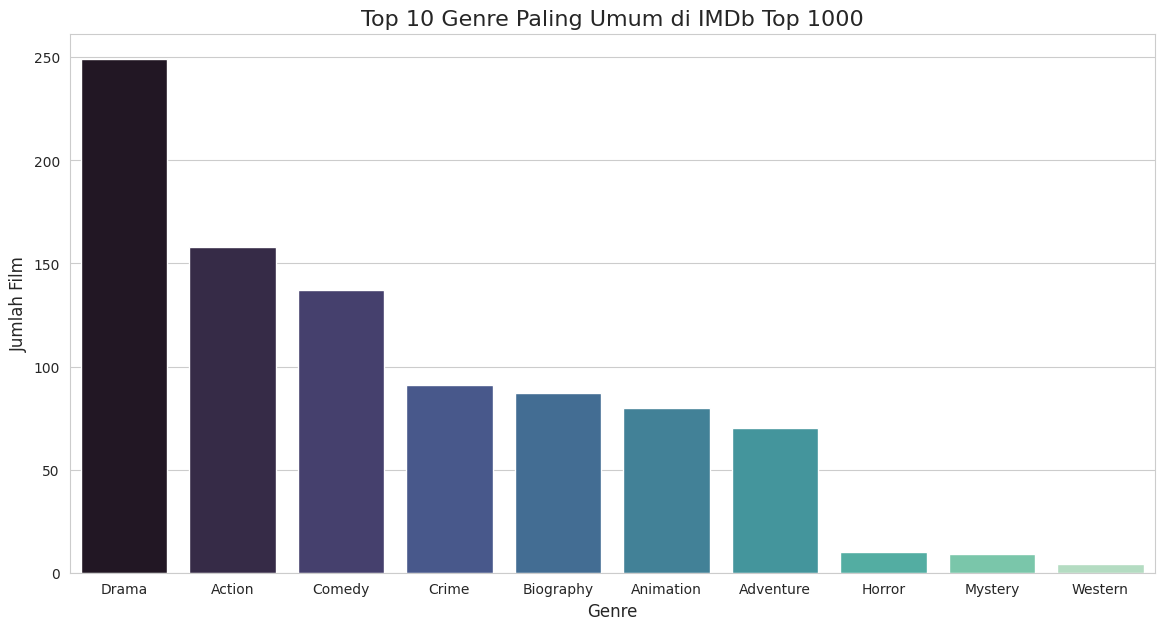

/tmp/ipython-input-929626635.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Main_Genre', y='IMDB_Rating', data=df_top_genres, palette='mako')


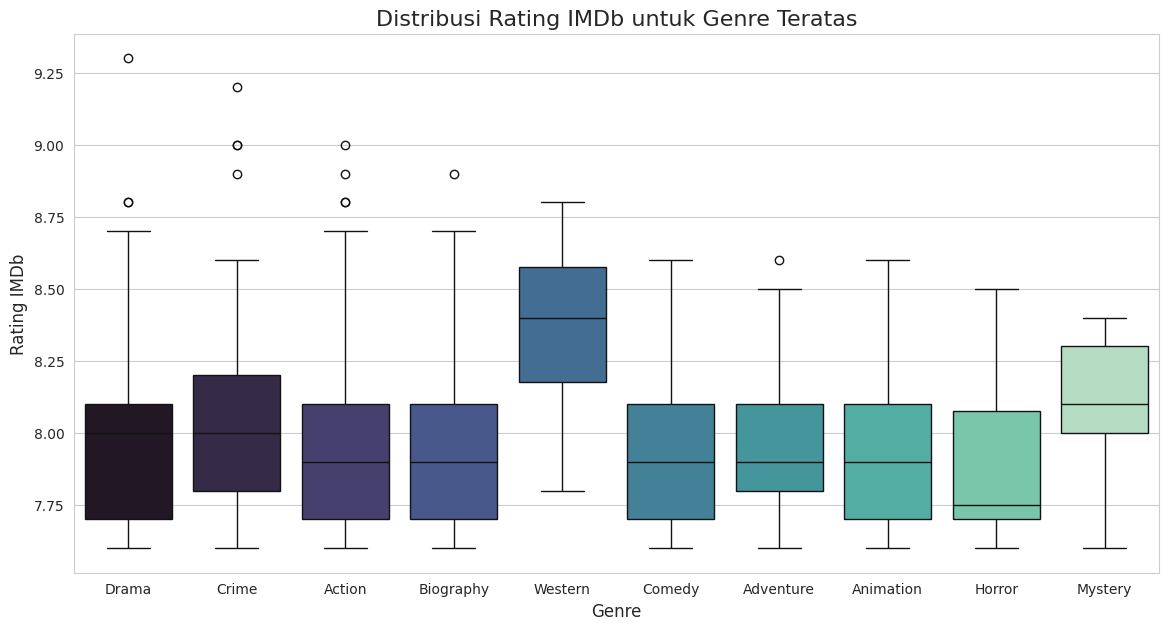

In [ ]:
# Ekstrak genre utama (genre pertama dari daftar)
df_clean['Main_Genre'] = df_clean['Genre'].apply(lambda x: x.split(',')[0])
top_10_genres = df_clean['Main_Genre'].value_counts().head(10)

# Visualisasi 1: Bar chart untuk genre paling umum
plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='mako')
plt.title('Top 10 Genre Paling Umum di IMDb Top 1000', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Jumlah Film', fontsize=12)
plt.show()

# Visualisasi 2: Box plot untuk distribusi rating per genre
plt.figure(figsize=(14, 7))
top_genres_list = top_10_genres.index.tolist()
df_top_genres = df_clean[df_clean['Main_Genre'].isin(top_genres_list)]
sns.boxplot(x='Main_Genre', y='IMDB_Rating', data=df_top_genres, palette='mako')
plt.title('Distribusi Rating IMDb untuk Genre Teratas', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating IMDb', fontsize=12)
plt.show()

Temuan 1: Genre Drama Paling Mendominasi
Grafik batang di atas menunjukkan jumlah film untuk setiap genre dalam daftar 1000 film terbaik IMDb.

* Poin Utama: Genre Drama adalah yang paling umum, dengan jumlah hampir 250 film. Angka ini jauh lebih tinggi dibandingkan genre lainnya.

* Kenapa Bisa Begitu? Ini cukup wajar, karena cerita yang berfokus pada pengembangan karakter dan konflik emosional (inti dari drama) sering kali menjadi dasar bagi film-film yang mendapat pujian kritis. Selain itu, genre Drama sangat fleksibel dan sering digabungkan dengan genre lain (misalnya, Crime Drama atau Sci-Fi Drama).

* Genre Populer Lainnya: Setelah Drama, genre seperti Action, Comedy, dan Crime juga cukup banyak muncul. Ini menunjukkan bahwa film-film yang menghibur dan penuh aksi juga memiliki tempat di antara film-film terbaik.

Temuan 2: Genre Paling Umum Belum Tentu Punya Rating Tertinggi
Grafik boxplot ini menunjukkan sebaran rating IMDb untuk setiap genre. Grafik ini membantu kita melihat apakah genre yang populer juga memiliki rating yang lebih tinggi secara konsisten.

* Poin Utama: Meskipun Drama adalah genre paling umum, median ratingnya (garis tengah di dalam kotak) bukanlah yang tertinggi. Genre Western dan Animation justru menunjukkan median rating yang sedikit lebih tinggi

* Artinya Apa? Ini menunjukkan sebuah tren menarik: tidak banyak film Western yang masuk ke dalam daftar top 1000, tetapi film Western yang berhasil masuk cenderung memiliki rating yang sangat tinggi. Bisa dibilang, standar untuk film Western agar dianggap sebagai salah satu yang terbaik itu sangat ketat.

* Konsistensi Rating: Genre Mystery memiliki kotak (rentang interkuartil) yang cukup rapat. Ini berarti rating untuk film-film Mystery terbaik cenderung tidak terlalu bervariasi dan konsisten berada di level yang tinggi.

* Film dengan Rating Istimewa: Genre Drama dan Crime memiliki beberapa "outlier" (titik di atas kotak), yang mewakili film-film dengan rating yang luar biasa tinggi, bahkan untuk standar film terbaik sekalipun. Contohnya adalah film seperti The Shawshank Redemption (Drama) atau The Godfather (Crime).

Kesimpulan Sederhana
1. Dari Segi Jumlah: Film dengan genre Drama adalah yang paling banyak ditemukan dalam daftar 1000 film terbaik IMDb.

2. Dari Segi Kualitas Rating: Jumlah yang banyak tidak otomatis berarti rating rata-rata tertinggi. Genre yang lebih jarang muncul seperti Western justru menunjukkan standar kualitas rating yang sangat tinggi untuk bisa masuk ke dalam daftar ini.

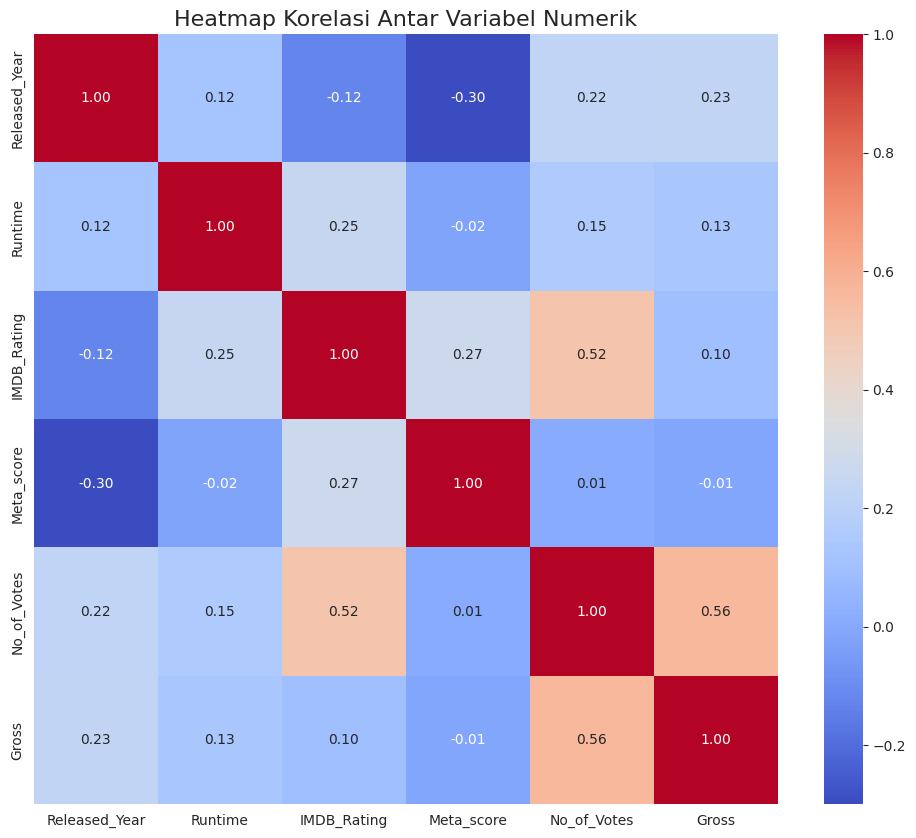

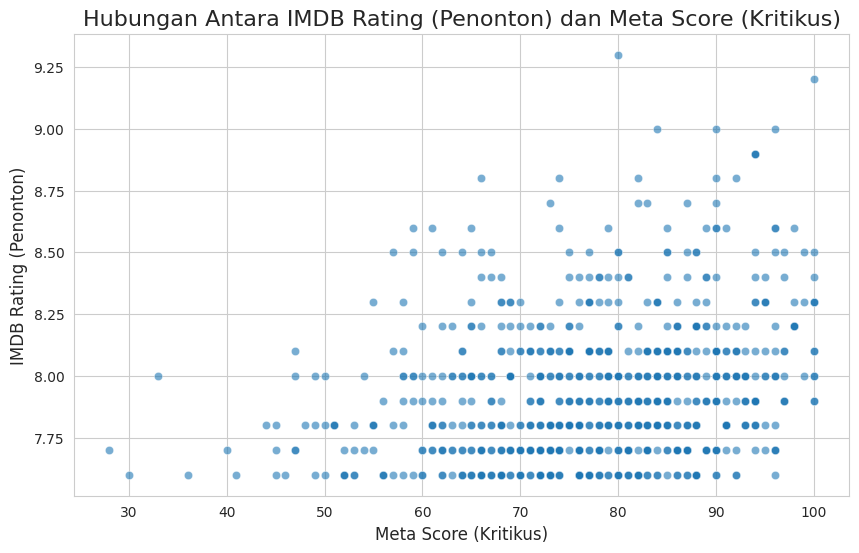

In [ ]:
# Visualisasi 1: Heatmap untuk melihat korelasi semua variabel numerik
numeric_cols = df_clean.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16)
plt.show()

# Visualisasi 2: Scatter plot untuk hubungan IMDB Rating vs Meta Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df_clean, alpha=0.6)
plt.title('Hubungan Antara IMDB Rating (Penonton) dan Meta Score (Kritikus)', fontsize=16)
plt.xlabel('Meta Score (Kritikus)', fontsize=12)
plt.ylabel('IMDB Rating (Penonton)', fontsize=12)
plt.show()

Analisis Grafik 1: Heatmap Korelasi
Grafik heatmap ini menunjukkan seberapa kuat hubungan antar variabel numerik. Warna yang lebih mendekati merah/oranye berarti hubungannya positif (jika satu naik, yang lain ikut naik), sementara warna biru berarti hubungannya negatif (jika satu naik, yang lain turun).

Berdasarkan diagram ini:

* Hubungan Positif Terkuat: Warna paling oranye (nilai 0.56) ada di antara Gross (Pendapatan) dan No_of_Votes (Jumlah Vote). Ini menunjukkan ada hubungan positif yang cukup kuat; film dengan jumlah vote lebih banyak cenderung memiliki pendapatan kotor yang lebih tinggi.

* Hubungan Positif Lainnya: Hubungan kuat lainnya (nilai 0.52) adalah antara No_of_Votes dan IMDB_Rating. Artinya, film dengan rating IMDb yang tinggi juga cenderung mendapatkan lebih banyak vote dari penonton.

* Hubungan Negatif: Ada hubungan negatif lemah (nilai -0.30) antara Released_Year (Tahun Rilis) dan Meta_score. Ini bisa berarti film-film yang lebih tua dalam daftar ini cenderung memiliki Meta Score yang sedikit lebih tinggi dibandingkan film-film yang lebih baru.

* Rating Penonton vs Kritikus: Hubungan antara IMDB_Rating dan Meta_score hanya 0.27. Ini menunjukkan hubungan positif yang lemah, yang akan kita lihat lebih jelas di grafik berikutnya.

Analisis Grafik 2: Hubungan Rating IMDB (Penonton) vs. Meta Score (Kritikus)
Grafik scatter plot ini memvisualisasikan hubungan antara rating penonton (IMDb) dan rating kritikus (Meta Score) untuk setiap film.

Berdasarkan sebaran titik-titik pada diagram:

* Tren Umum Positif: Secara umum, titik-titik data bergerak dari kiri bawah ke kanan atas. Ini menunjukkan adanya tren positif: film yang mendapat skor tinggi dari kritikus (Meta Score) cenderung mendapat rating tinggi pula dari penonton (IMDb Rating).

* Hubungan Tidak Sempurna: Meskipun ada tren positif, titik-titik data tersebar cukup luas dan tidak membentuk garis lurus yang rapi. Ini menegaskan apa yang kita lihat di heatmap sebelumnya (korelasi 0.27), yaitu hubungan antara keduanya tidak terlalu kuat.

* Perbedaan Pendapat: Sebaran data yang luas ini menunjukkan bahwa selera kritikus dan penonton tidak selalu sejalan. Ada film dengan Meta Score sangat tinggi (di atas 90) namun rating IMDb-nya biasa saja (sekitar 8.0). Sebaliknya, ada film dengan rating IMDb sangat tinggi (di atas 9.0) tetapi Meta Score-nya tidak mencapai 100.

Kesimpulan dari Kedua Grafik:
Kritikus dan penonton secara umum memiliki arah selera yang sama, namun tidak selalu sepakat pada tingkat yang kuat. Kesuksesan finansial sebuah film (Gross) lebih berhubungan erat dengan popularitasnya (No_of_Votes) daripada dengan ratingnya sendiri.